In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

In [10]:
yan_d=pd.read_csv('count_yan.csv')
yanimp_d=pd.read_csv('yan_imputed.csv',header=None)
yan=yan_d.values
yanimp=yanimp_d.values

In [13]:
yan[1][87]

0.0

In [14]:
yanimp[1][87]

0.543238199287998

In [18]:
yan=np.transpose(yan)

In [19]:
yan.shape

(90, 4725)

In [20]:
import csv

with open("yan_unimputed_t.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(yan)

In [21]:
import numpy as np
import pandas as pd
import scanpy as sc

In [22]:
adata=sc.read_csv('yan_unimputed_t.csv',delimiter=',', first_column_names=None, dtype='float32')

In [23]:
adata.X.shape

(90, 4725)

In [24]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)

sc.pp.scale(adata, max_value=10)

In [25]:
adata

AnnData object with n_obs × n_vars = 90 × 4725
    obs: 'n_genes'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p'

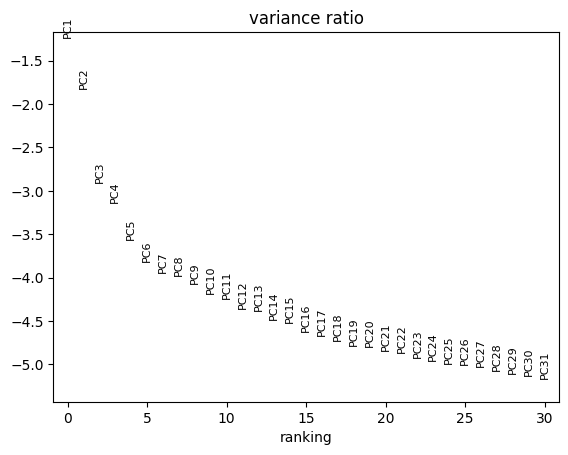

In [26]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

In [27]:
#create neighborhood graph using 20 pcs 
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
##dim reduction using umap
sc.tl.umap(adata)
#Leiden clustering
#import leidenalg
#sc.tl.leiden(adata5)
##visualizing clusters
#sc.pl.umap(adata5, color=['leiden'])

/home/zaman/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


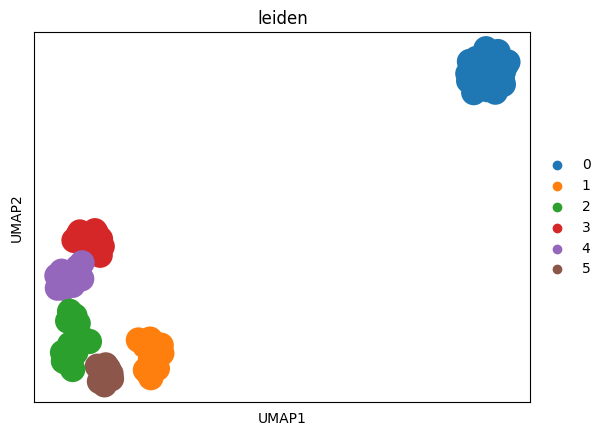

In [28]:
import leidenalg
sc.tl.leiden(adata)
##visualizing clusters
sc.pl.umap(adata, color=['leiden'])

In [29]:
adata.obs['leiden']

0     3
1     3
2     3
3     3
4     3
     ..
85    0
86    0
87    0
88    0
89    0
Name: leiden, Length: 90, dtype: category
Categories (6, object): ['0', '1', '2', '3', '4', '5']

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(adata.X, adata.obs['leiden'],metric='euclidean')
silhouette_avg

0.12678376

In [31]:
import pandas as pd
import numpy as np
l1=np.genfromtxt('yan_celltype.csv',dtype=None, delimiter=",")
l2=adata.obs['leiden']

/tmp/ipykernel_25167/203101203.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  l1=np.genfromtxt('yan_celltype.csv',dtype=None, delimiter=",")


In [32]:
from sklearn import metrics
ari=metrics.adjusted_rand_score(l1,l2)
ari

0.85754979146273